In [1]:
import requests

import torch
from PIL import Image, ImageDraw
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 
import matplotlib.pyplot as plt 
import cv2


/Users/jli28/.pyenv/versions/3.11.1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RuntimeError: Failed to import transformers.models.auto.processing_auto because of the following error (look up to see its traceback):
No module named '_lzma'

In [4]:
model_id = "IDEA-Research/grounding-dino-base"

if torch.cuda.is_available():
    device = "cuda" 
elif torch.backends.mps.is_available():
    device = "mps" 
else:
    device = "cpu"

processor = AutoProcessor.from_pretrained(model_id)


NameError: name 'AutoProcessor' is not defined

In [3]:
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

In [4]:
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open("/Users/jli28/Desktop/FRC_images/img2.jpg")

# VERY important: text needs to be lowercase + ends with "."
text = "a green ball."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.3,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)


NameError: name 'Image' is not defined

In [40]:
results

[{'scores': tensor([0.9105], device='mps:0'),
  'labels': ['a green ball'],
  'boxes': tensor([[2308.7505,   72.3288, 4356.1152, 2077.4443]], device='mps:0')}]

In [2]:
draw = ImageDraw.Draw(image)
for bb in results[0]['boxes']:
    bb = bb.cpu().numpy()
    print(bb)
    
    draw.rectangle([(bb[0],bb[1]),(bb[2],bb[3])], outline ="red", width = 10)


NameError: name 'ImageDraw' is not defined

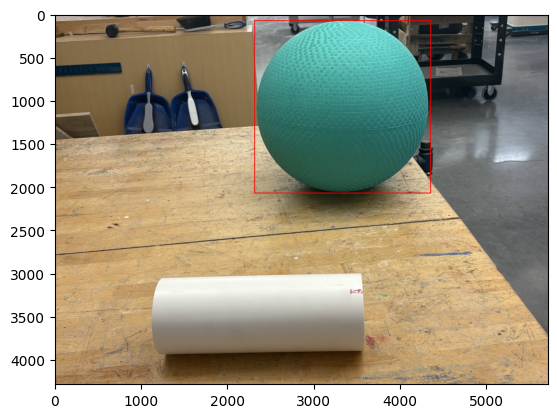

In [49]:
plt.imshow(image)